In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv("/Users/egorpovarnicyn/Desktop/Files/data_science/case_test.csv")

In [4]:
print("Erste paar Zeilen der Daten:")
print(data.head())

Erste paar Zeilen der Daten:
         Date  Sessions  Users  conversions  calls  SEA Sessions  \
0  01.06.2023      9518   9721          177     21          3363   
1  02.06.2023      3969   3929          144     16          1363   
2  03.06.2023      5894   5468          198     32          1866   
3  04.06.2023      2983   2922          222     33          1034   
4  05.06.2023      3008   2765          220     18          1003   

   SEO Sessions  DIRECT Sessions  
0          2887             2919  
1          1323             1217  
2          1965             1827  
3           984             1074  
4          1073             1003  


In [5]:
print("Allgemeine Informationen:")
print(data.info())

Allgemeine Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             214 non-null    object
 1   Sessions         214 non-null    int64 
 2   Users            214 non-null    int64 
 3   conversions      214 non-null    int64 
 4   calls            214 non-null    int64 
 5   SEA Sessions     214 non-null    int64 
 6   SEO Sessions     214 non-null    int64 
 7   DIRECT Sessions  214 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.5+ KB
None


# Datenüberblick:
1. Die Daten umfassen Informationen für 7 Monate des Jahres 2023, beginnend am 1. Juni 2023.
2. Es gibt 214 Datensätze (Zeilen) und 8 Datenfelder.
3. Das "Date"-Feld ist im Objektformat (Zeichenkette) dargestellt, während die anderen Felder numerische Werte enthalten.

In [6]:
print("Deskriptive Statistiken:")
print(data.describe())

Deskriptive Statistiken:
            Sessions          Users  conversions       calls  SEA Sessions  \
count     214.000000     214.000000   214.000000  214.000000    214.000000   
mean    11117.672897   11036.883178   107.392523   12.925234   3676.331776   
std     13190.778570   13068.608286    45.608820    7.147278   4233.369748   
min         0.000000       0.000000     0.000000    0.000000      0.000000   
25%      3307.750000    3008.000000    87.250000    8.250000   1027.250000   
50%      6804.000000    6810.000000   111.000000   12.000000   2284.500000   
75%     13856.750000   13619.250000   137.000000   17.000000   4817.250000   
max    104257.000000  103204.000000   222.000000   36.000000  26809.000000   

       SEO Sessions  DIRECT Sessions  
count    214.000000       214.000000  
mean    3556.000000      3841.434579  
std     4169.942106      4902.077849  
min        0.000000         0.000000  
25%     1087.250000      1150.500000  
50%     2087.500000      2223.000000  

# Statistik:
1. Die durchschnittliche Anzahl der Sitzungen beträgt etwa 11.117, während die durchschnittliche Anzahl der Benutzer etwa 11.037 beträgt.
2. Die durchschnittliche tägliche Anzahl von Konversionen liegt bei etwa 107, während die durchschnittliche Anzahl von Anrufen bei etwa 12 liegt.
3. Die maximalen Werte für Sitzungen und Benutzer übertreffen deutlich die Durchschnittswerte, was auf das Vorhandensein von Ausreißern hinweisen kann.

# Potenzielle Anomalien:
1. In den Daten gibt es Nullwerte in den Spalten "Sessions", "Users" und "Calls", was auf Anomalien oder fehlende Daten hinweisen kann. Am 17.07.2023 und 18.07.2023 wurden keine Daten erfasst.
2. Es gibt auch sehr hohe Werte in den Spalten "Sessions" und "Users", die deutlich über den Durchschnittswerten und dem dritten Quartil liegen, was ebenfalls auf Anomalien oder Ausreißer hinweisen kann. Am 25.10.2023 wurde ein Maximum an Direct-Sitzungen registriert.

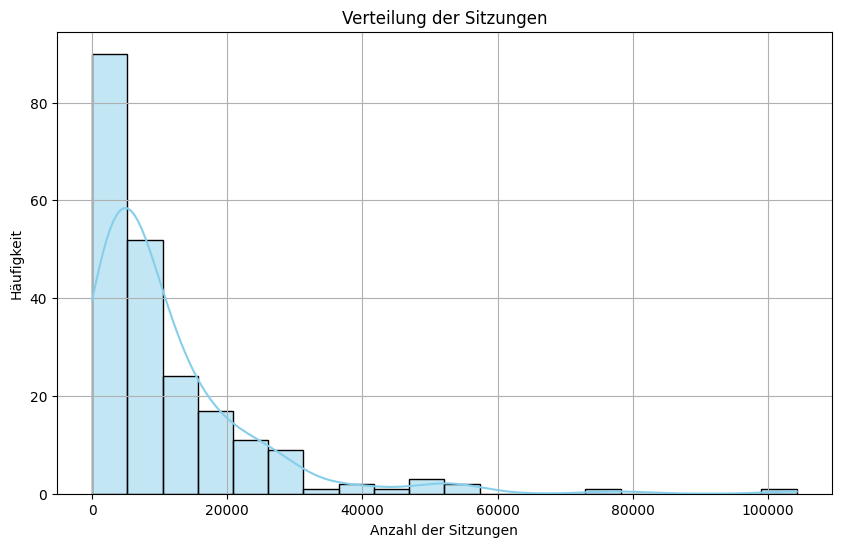

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sessions'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Verteilung der Sitzungen')
plt.xlabel('Anzahl der Sitzungen')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

Die absolute Mehrheit der Sitzungen, 64 %, fiel in den Bereich von 0-10k Sitzungen, 20,5 % in den Bereich von 10-20k Sitzungen, 10 % in den Bereich von 20-30k Sitzungen.

Weniger als 6 % fielen in die anderen Bins, nämlich 1,4 % in den Bereich von 30-40k, weniger als 1 % in den Bereich von 40-50k, 70-80k und 100-110k, 2,3 % in den Bereich von 50-59k, 0 % in den Bereich von 60-70k und Bins 80-100k.








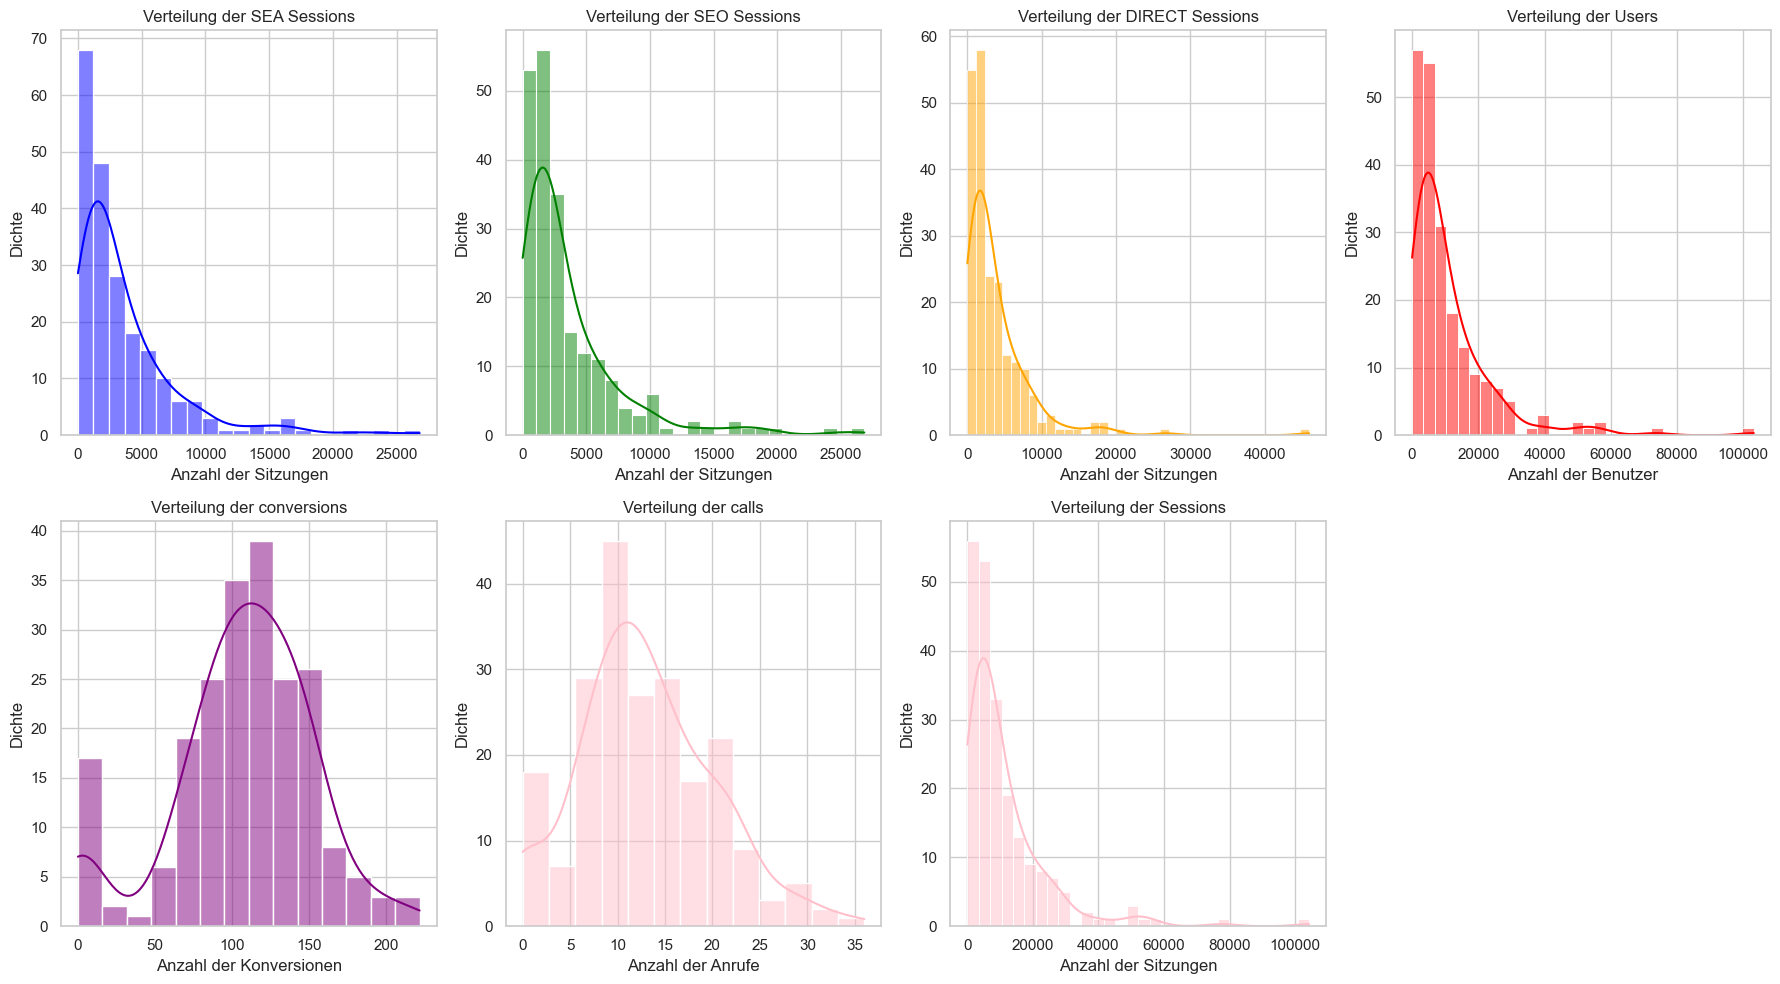

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 10))

plt.subplot(2, 4, 1)
sns.histplot(data['SEA Sessions'], kde=True, color='blue', alpha=0.5)
plt.title('Verteilung der SEA Sessions')
plt.xlabel('Anzahl der Sitzungen')
plt.ylabel('Dichte')

plt.subplot(2, 4, 2)
sns.histplot(data['SEO Sessions'], kde=True, color='green', alpha=0.5)
plt.title('Verteilung der SEO Sessions')
plt.xlabel('Anzahl der Sitzungen')
plt.ylabel('Dichte')

plt.subplot(2, 4, 3)
sns.histplot(data['DIRECT Sessions'], kde=True, color='orange', alpha=0.5)
plt.title('Verteilung der DIRECT Sessions')
plt.xlabel('Anzahl der Sitzungen')
plt.ylabel('Dichte')

plt.subplot(2, 4, 4)
sns.histplot(data['Users'], kde=True, color='red', alpha=0.5)
plt.title('Verteilung der Users')
plt.xlabel('Anzahl der Benutzer')
plt.ylabel('Dichte')

plt.subplot(2, 4, 5)
sns.histplot(data['conversions'], kde=True, color='purple', alpha=0.5)
plt.title('Verteilung der conversions')
plt.xlabel('Anzahl der Konversionen')
plt.ylabel('Dichte')

plt.subplot(2, 4, 6)
sns.histplot(data['calls'], kde=True, color='pink', alpha=0.5)
plt.title('Verteilung der calls')
plt.xlabel('Anzahl der Anrufe')
plt.ylabel('Dichte')

plt.subplot(2, 4, 7)
sns.histplot(data['Sessions'], kde=True, color='pink', alpha=0.5)
plt.title('Verteilung der Sessions')
plt.xlabel('Anzahl der Sitzungen')
plt.ylabel('Dichte')

plt.tight_layout()
plt.show()


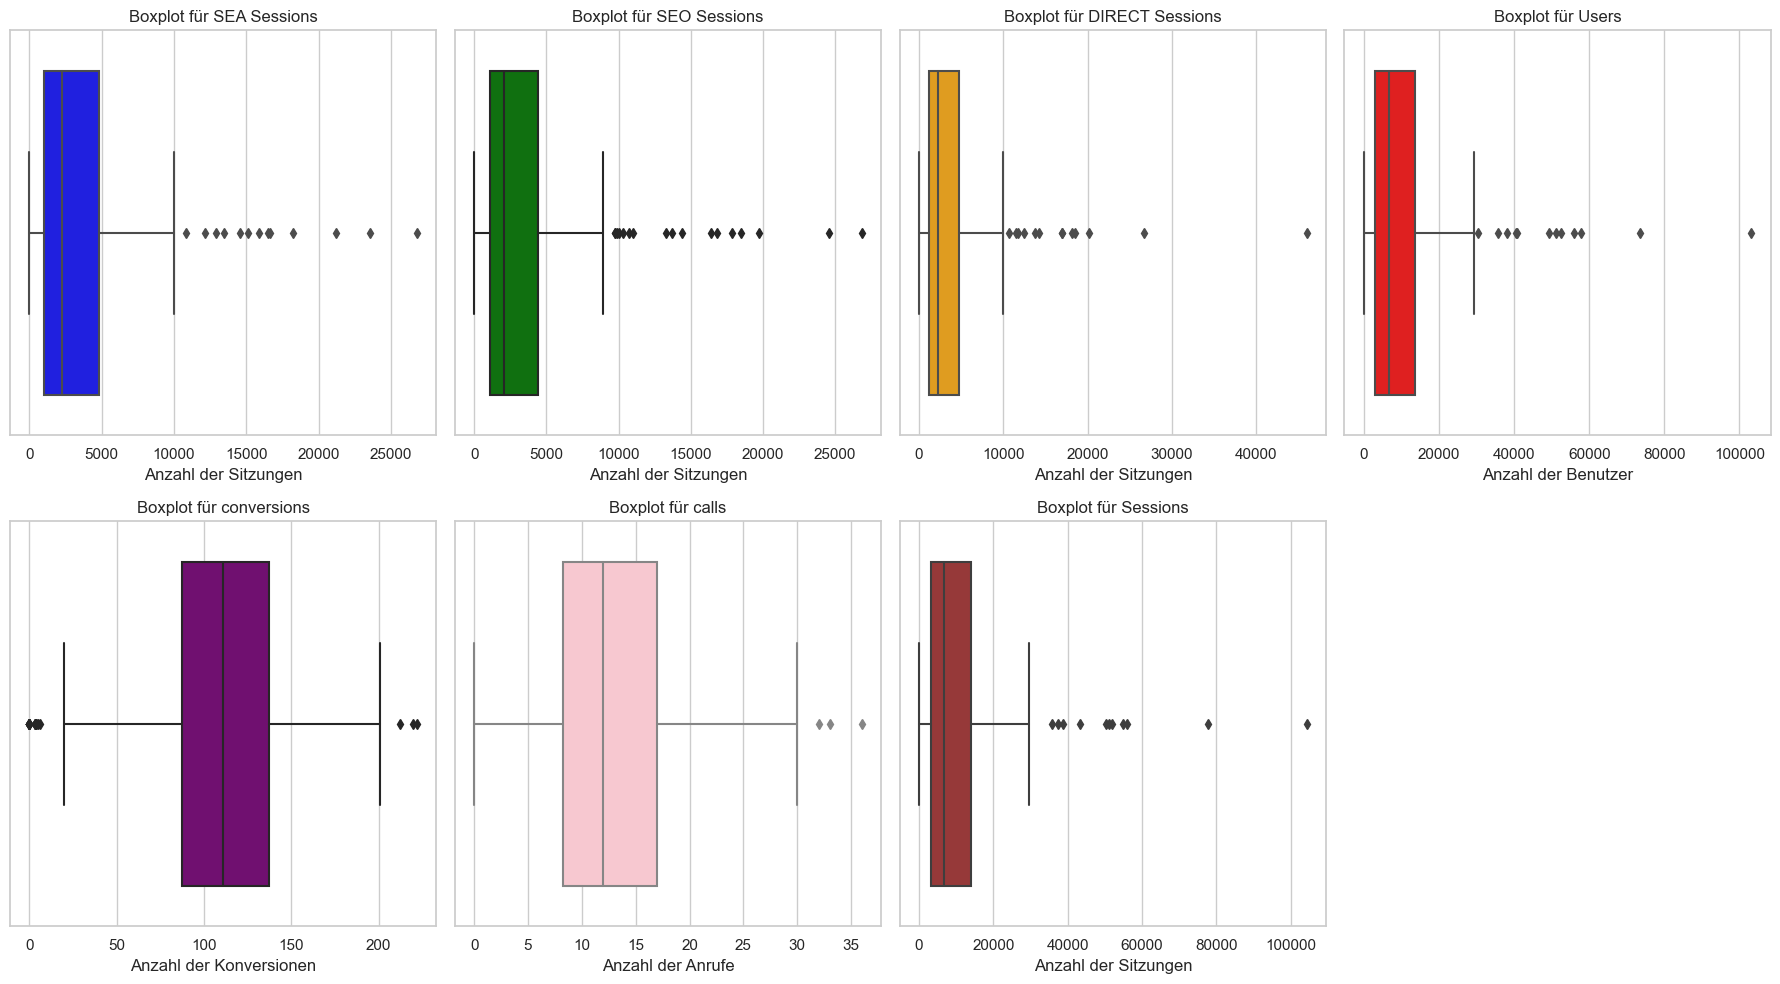

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 10))

plt.subplot(2, 4, 1)
sns.boxplot(x=data['SEA Sessions'], color='blue')
plt.title('Boxplot für SEA Sessions')
plt.xlabel('Anzahl der Sitzungen')

plt.subplot(2, 4, 2)
sns.boxplot(x=data['SEO Sessions'], color='green')
plt.title('Boxplot für SEO Sessions')
plt.xlabel('Anzahl der Sitzungen')

plt.subplot(2, 4, 3)
sns.boxplot(x=data['DIRECT Sessions'], color='orange')
plt.title('Boxplot für DIRECT Sessions')
plt.xlabel('Anzahl der Sitzungen')

plt.subplot(2, 4, 4)
sns.boxplot(x=data['Users'], color='red')
plt.title('Boxplot für Users')
plt.xlabel('Anzahl der Benutzer')

plt.subplot(2, 4, 5)
sns.boxplot(x=data['conversions'], color='purple')
plt.title('Boxplot für conversions')
plt.xlabel('Anzahl der Konversionen')

plt.subplot(2, 4, 6)
sns.boxplot(x=data['calls'], color='pink')
plt.title('Boxplot für calls')
plt.xlabel('Anzahl der Anrufe')

plt.subplot(2, 4, 7)
sns.boxplot(x=data['Sessions'], color='brown')
plt.title('Boxplot für Sessions')
plt.xlabel('Anzahl der Sitzungen')

plt.tight_layout()
plt.show()


# Korrelationsmatrix zwischen den Variablen

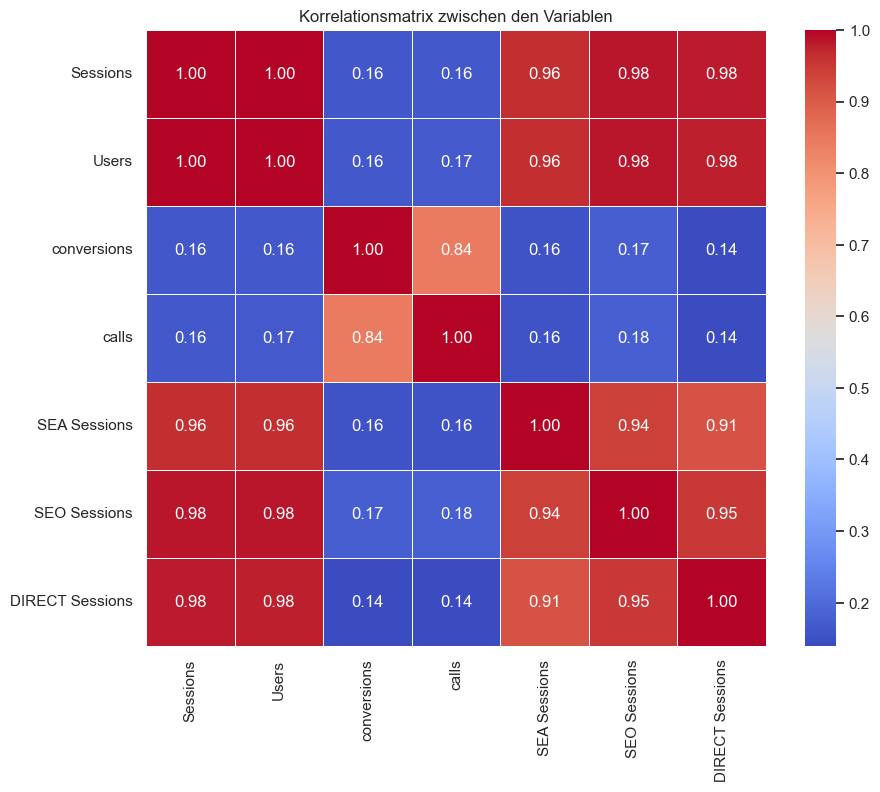

In [12]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix zwischen den Variablen')
plt.show()


# Pair Plots für korrelierende Indikatoren

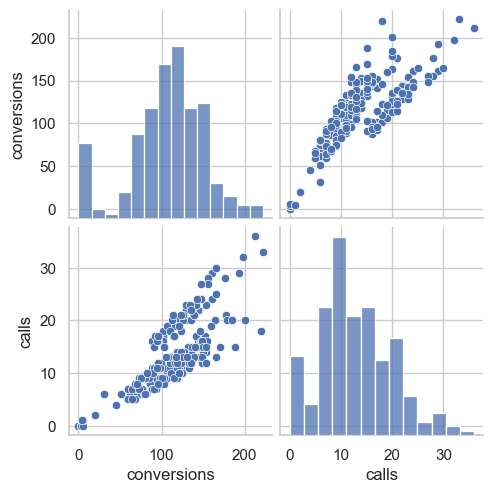

In [14]:
selected_vars = ['conversions', 'calls']

sns.pairplot(data[selected_vars])
plt.show()

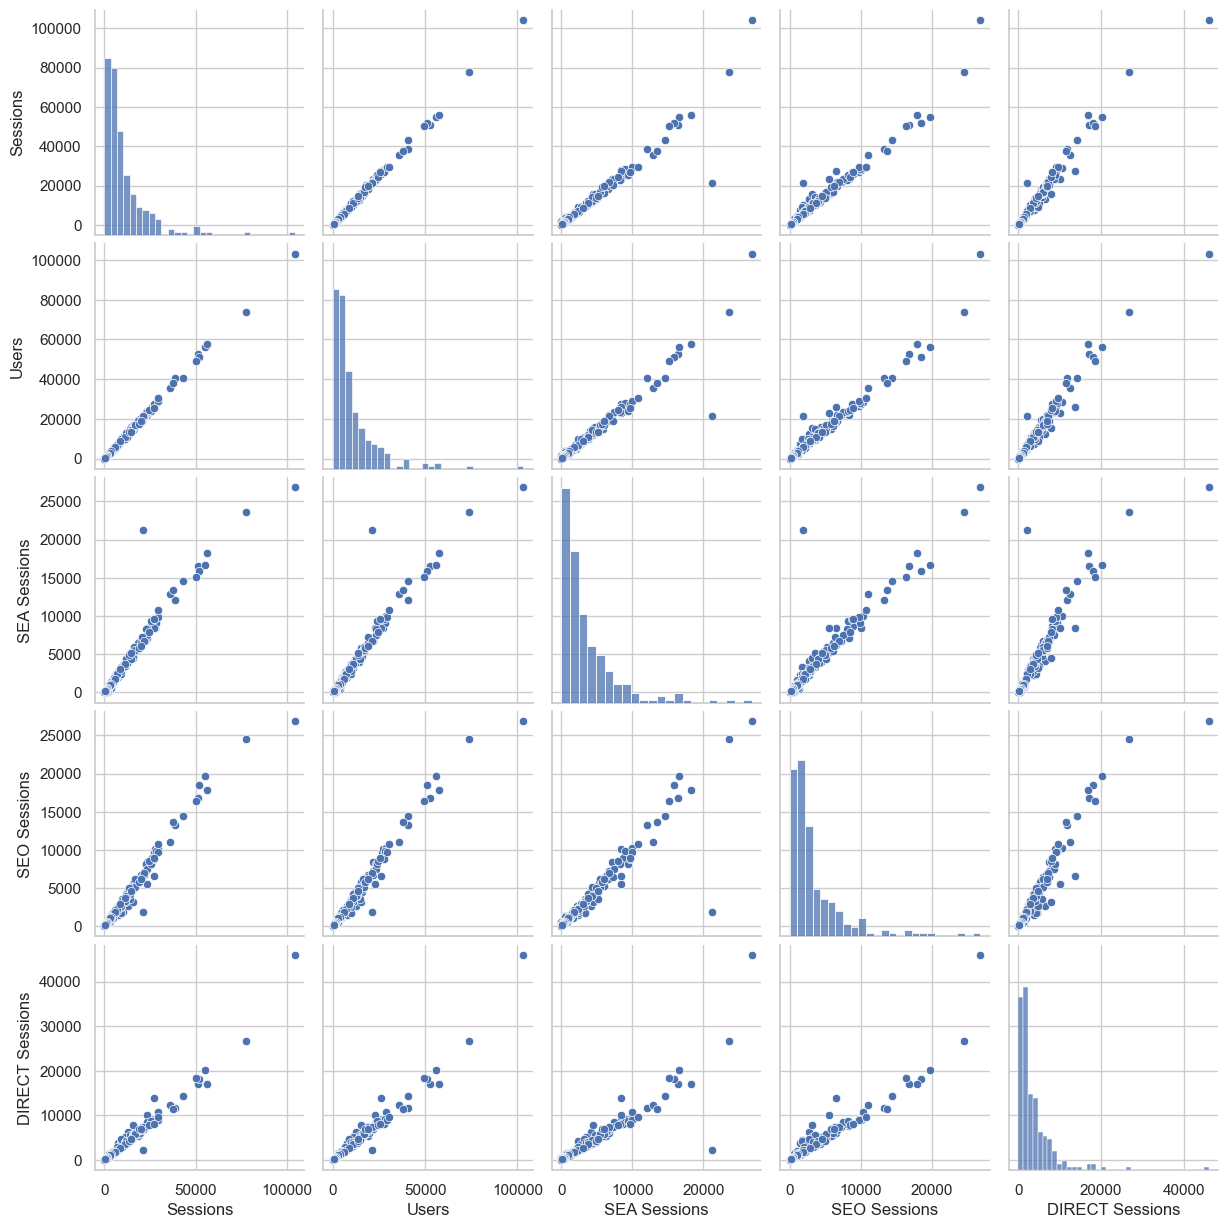

In [15]:
selected_vars = ['Sessions', 'Users', 'SEA Sessions', 'SEO Sessions', 'DIRECT Sessions']

sns.pairplot(data[selected_vars])
plt.show()

# Zeitreihenanalyse

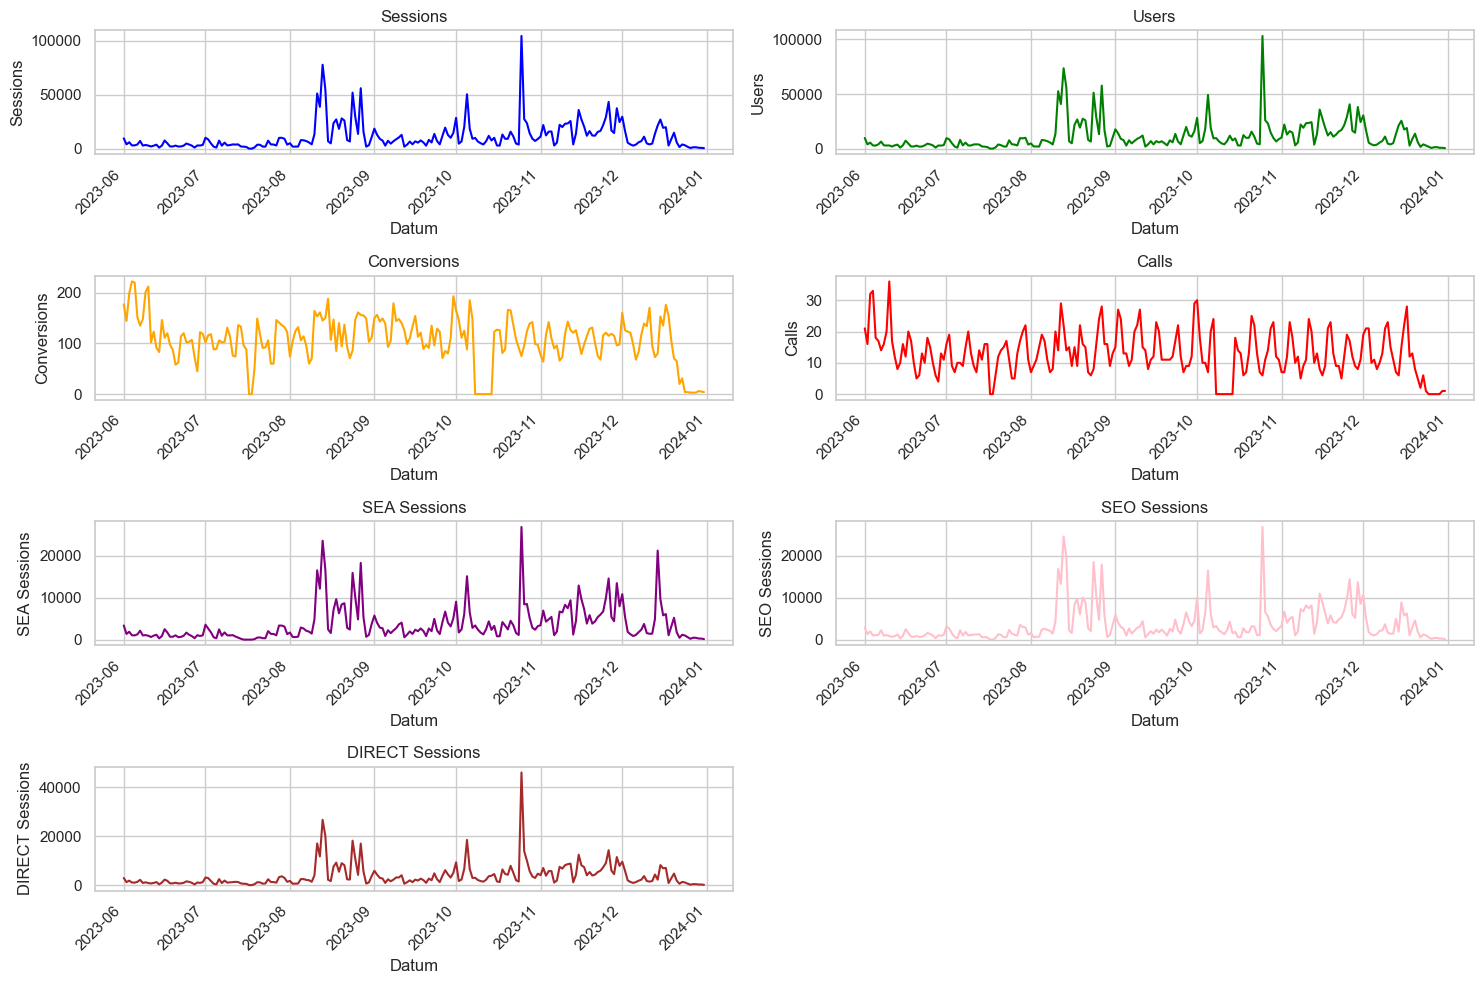

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
plt.plot(data['Date'], data['Sessions'], color='blue')
plt.title('Sessions')
plt.xlabel('Datum')
plt.ylabel('Sessions')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 2)
plt.plot(data['Date'], data['Users'], color='green')
plt.title('Users')
plt.xlabel('Datum')
plt.ylabel('Users')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 3)
plt.plot(data['Date'], data['conversions'], color='orange')
plt.title('Conversions')
plt.xlabel('Datum')
plt.ylabel('Conversions')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 4)
plt.plot(data['Date'], data['calls'], color='red')
plt.title('Calls')
plt.xlabel('Datum')
plt.ylabel('Calls')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 5)
plt.plot(data['Date'], data['SEA Sessions'], color='purple')
plt.title('SEA Sessions')
plt.xlabel('Datum')
plt.ylabel('SEA Sessions')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 6)
plt.plot(data['Date'], data['SEO Sessions'], color='pink')
plt.title('SEO Sessions')
plt.xlabel('Datum')
plt.ylabel('SEO Sessions')
plt.xticks(rotation=45, ha='right')

plt.subplot(4, 2, 7)
plt.plot(data['Date'], data['DIRECT Sessions'], color='brown')
plt.title('DIRECT Sessions')
plt.xlabel('Datum')
plt.ylabel('DIRECT Sessions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Zeitreihenanalyse
Die Grafiken der Zeitreihen für Sitzungen, Benutzer, SEA-Sitzungen, SEO-Sitzungen und DIREKT-Sitzungen sehen fast identisch aus. Eine ähnliche Situation besteht bei den Conversions und Anrufen.
1. Es gibt signifikante Peaks im August 2023, Ende September - Anfang Oktober 2023 und Ende Oktober 2023 (ähnlich dem Start von Werbekampagnen).
2. Auch im November-Dezember 2023 sind diese Metriken um ein Vielfaches höher als im Juni-Juli 2023 (Nachfragesaisonalität).
3. Bei den Conversions und Anrufen gibt es 2 steile Abfälle auf 0 am 18.07 und 19.07.2023, als alle Metriken auf 0 fielen (Website-Tracker defekt). Ebenso fielen die Conversions und Anrufe vom 08.10 bis 14.10.2023 auf 0, obwohl der restliche Verkehr normal war (Pixel defekt?).